In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

In [360]:
display = pd.options.display
display.max_columns = 1000
display.max_rows = 50
display.max_colwidth = 199
display.width = 1000

In [362]:
training_df=pd.read_csv('GiveMeSomeCredit-training.csv')
testing_df=pd.read_csv('GiveMeSomeCredit-testing.csv')

In [364]:
training_df=training_df.iloc[:,1:training_df.shape[1]]

In [366]:
training_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# Functions

In [369]:
def CreateMissingValueCorrelationHeatMap(dataframe):
    plt.figure(figsize=(16, 6))
    no_na=dataframe.dropna(axis=1)
    cols_na=dataframe.columns[dataframe.isna().any()]
    
    for i in cols_na:
        no_na[i]=dataframe[i].apply(lambda x: 1 if pd.isna(x) else 0)

    
    corr_matrix=no_na.corr()
    corr_matrix=corr_matrix[corr_matrix.index.isin(cols_na)]
    heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Missing Value Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

    return heatmap;
    
def CreateMissingValueTable(dataframe):
    mis_val=dataframe.isnull().sum()
    mis_val_percent = 100 * dataframe.isnull().sum() / len(dataframe)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns=mis_val_table_ren_columns[mis_val_table_ren_columns['Missing Values']!=0]
    
    
    return mis_val_table_ren_columns


def CreateCorrelationHeatMap(dataframe):
    plt.figure(figsize=(16, 6))
    heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
    
    return heatmap;

def DrawHistogramForEachColumn(df, n_rows, n_cols):
    fig=plt.figure(figsize=(20, 10))
    for i,cols in enumerate(df):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[cols].hist(bins=100,ax=ax)
        title_obj = ax.set_title(cols+" Distribution")
        plt.ticklabel_format(style='plain')
        plt.setp(title_obj, color='b')
        ax.xaxis.label.set_color('black')  
        ax.yaxis.label.set_color('black')          
        ax.tick_params(axis='x', colors='black')      
        ax.tick_params(axis='y', colors='black')   
    fig.tight_layout()  
    plt.show()
    
def DrawBoxPlot(df,n_cols,n_rows):
    fig=plt.figure(figsize=(20,10))
    
    for i,cols in enumerate(df):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.boxplot(x=df[cols])
        #df[cols].boxplot()
        title_obj = ax.set_title(cols+" Boxplot")
        plt.setp(title_obj, color='b')
        ax.xaxis.label.set_color('black')  
        ax.yaxis.label.set_color('black')          
        ax.tick_params(axis='x', colors='black')      
        ax.tick_params(axis='y', colors='black')   
    fig.tight_layout()  
    plt.show()
    
def set_pandas_display_options():
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 10_000
    display.max_colwidth = 199
    display.width = 1000
    # display.precision = 2  # set as needed
    # display.float_format = lambda x: '{:,.2f}'.format(x)  # set as needed

def PercentileAnalysis(df,col,percentile_threshold,increment_size=0.001):
    i=percentile_threshold
    percentile=np.empty(0)
    number_of_points_left_of_current_percentile=np.empty(0)
    while (i<=1):
        
        upper_percentile = df[col].quantile(i)
       
        number_of_points_left_of_current_percentile=np.append(number_of_points_left_of_current_percentile,len(df[df[col]<=upper_percentile][col]))
        percentile=np.append(percentile,i)
        
        i=i+increment_size
        
    res=pd.DataFrame({'Percentile':percentile, 
                      '# of points left of percentile':number_of_points_left_of_current_percentile})
    
    res['number of points in current bin']=res['# of points left of percentile']-res['# of points left of percentile'].shift(1).fillna(0)
   
    return res
    
def plot_roc_curve(false_positive_rate, true_positive_rate, label="ROC Curve"):
    """
        Purpose: To plot an ROC curve.
    """
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    plt.plot(false_positive_rate, true_positive_rate, linewidth=1)
    plt.plot([0,1],[0,1], "r--") 
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate") 
    
    title_obj = ax.set_title(label)
    plt.setp(title_obj, color='w')                     # Individual title colours.
    ax.xaxis.label.set_color('white')  
    ax.yaxis.label.set_color('white')          
    ax.tick_params(axis='x', colors='white')       #set the color of xticks
    ax.tick_params(axis='y', colors='white')       #set the color of yticks    
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    plt.grid(b=True, which='major', color='gray', linestyle='--')
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
        

   

# Correlation

<Axes: title={'center': 'Correlation Heatmap'}>

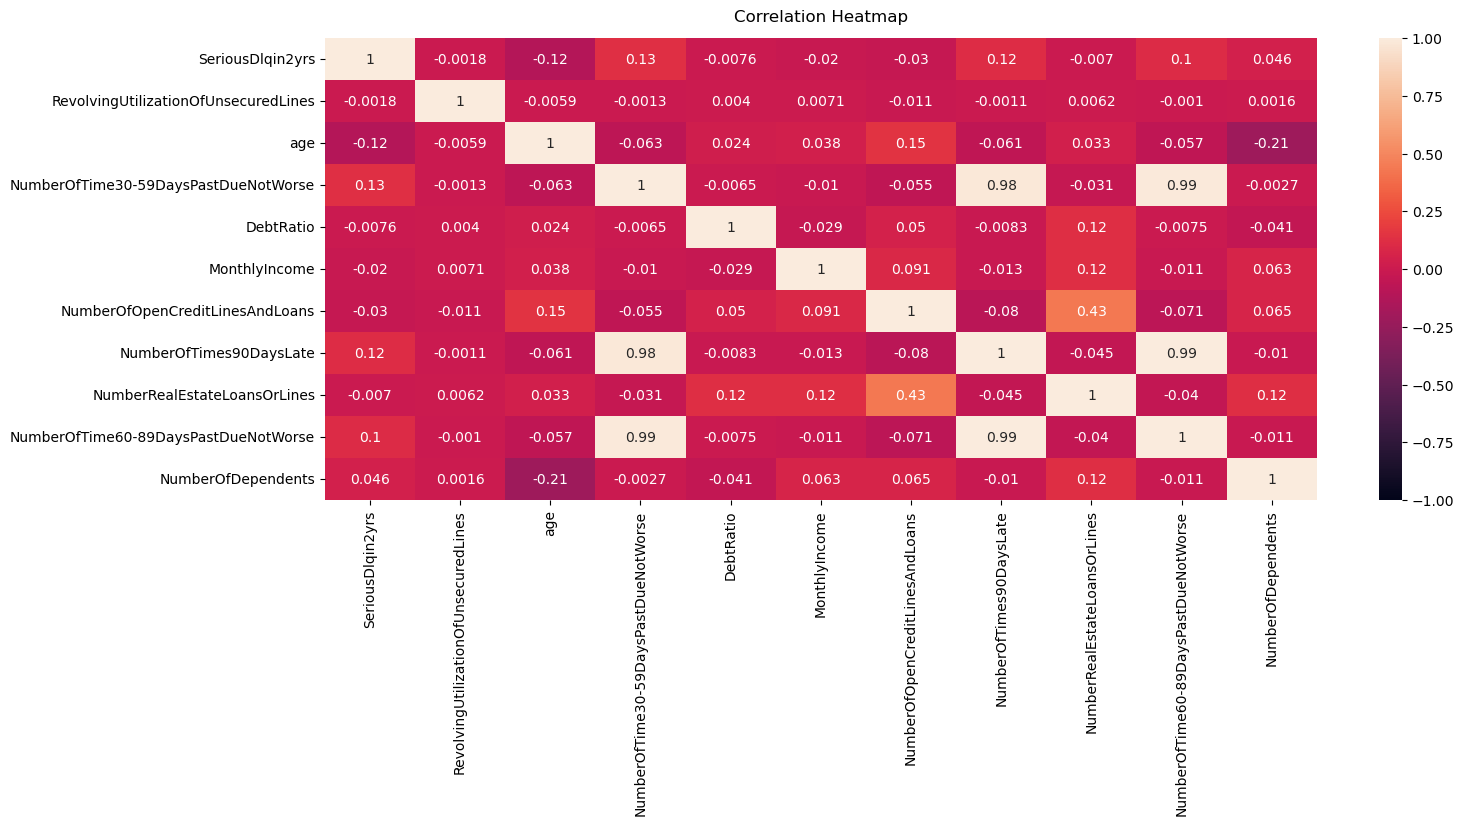

In [372]:
CreateCorrelationHeatMap(training_df)

# Missing Value Analys

In [374]:
CreateMissingValueTable(training_df)

,Missing Values,% of Total Values
MonthlyIncome,29731,19.820667
NumberOfDependents,3924,2.616000


/var/folders/r8/46qbgcxj5jl_n265fhkxg2qw0000gn/T/ipykernel_55332/2614921274.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_na[i]=dataframe[i].apply(lambda x: 1 if pd.isna(x) else 0)


<Axes: title={'center': 'Missing Value Correlation Heatmap'}>

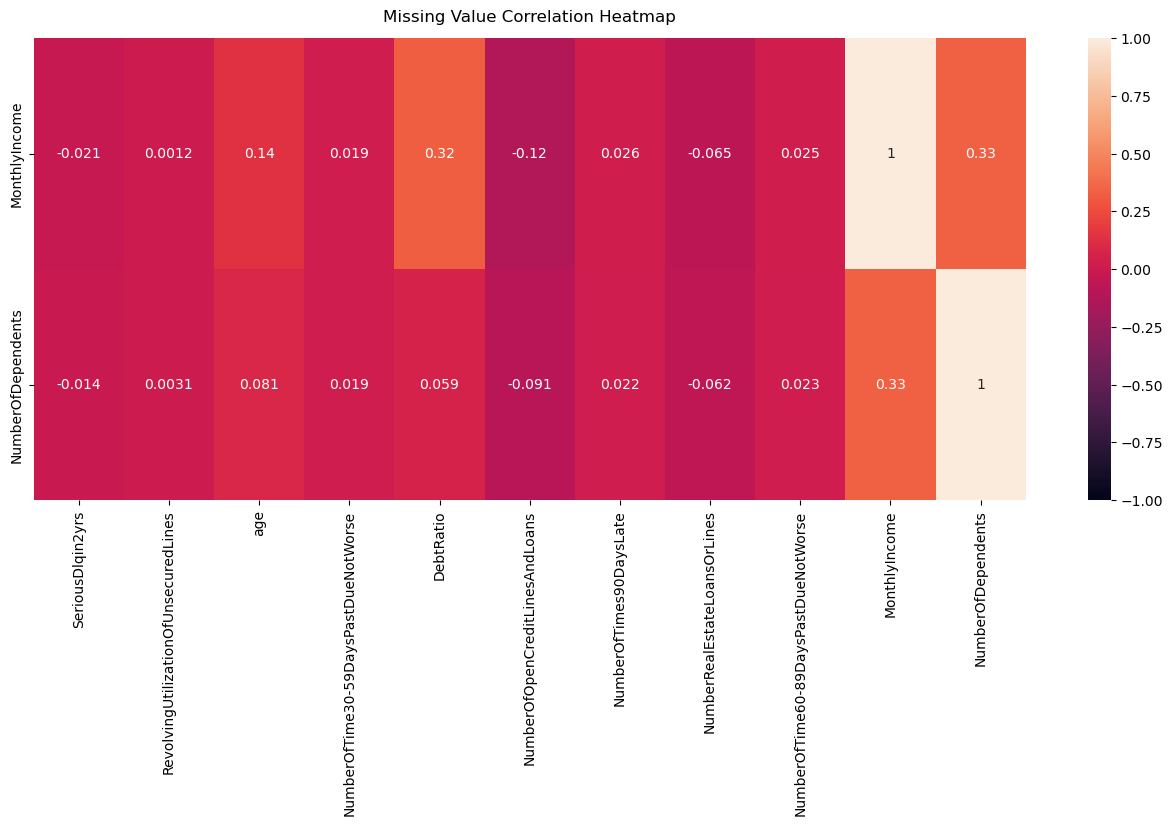

In [377]:
CreateMissingValueCorrelationHeatMap(training_df)

<Axes: >

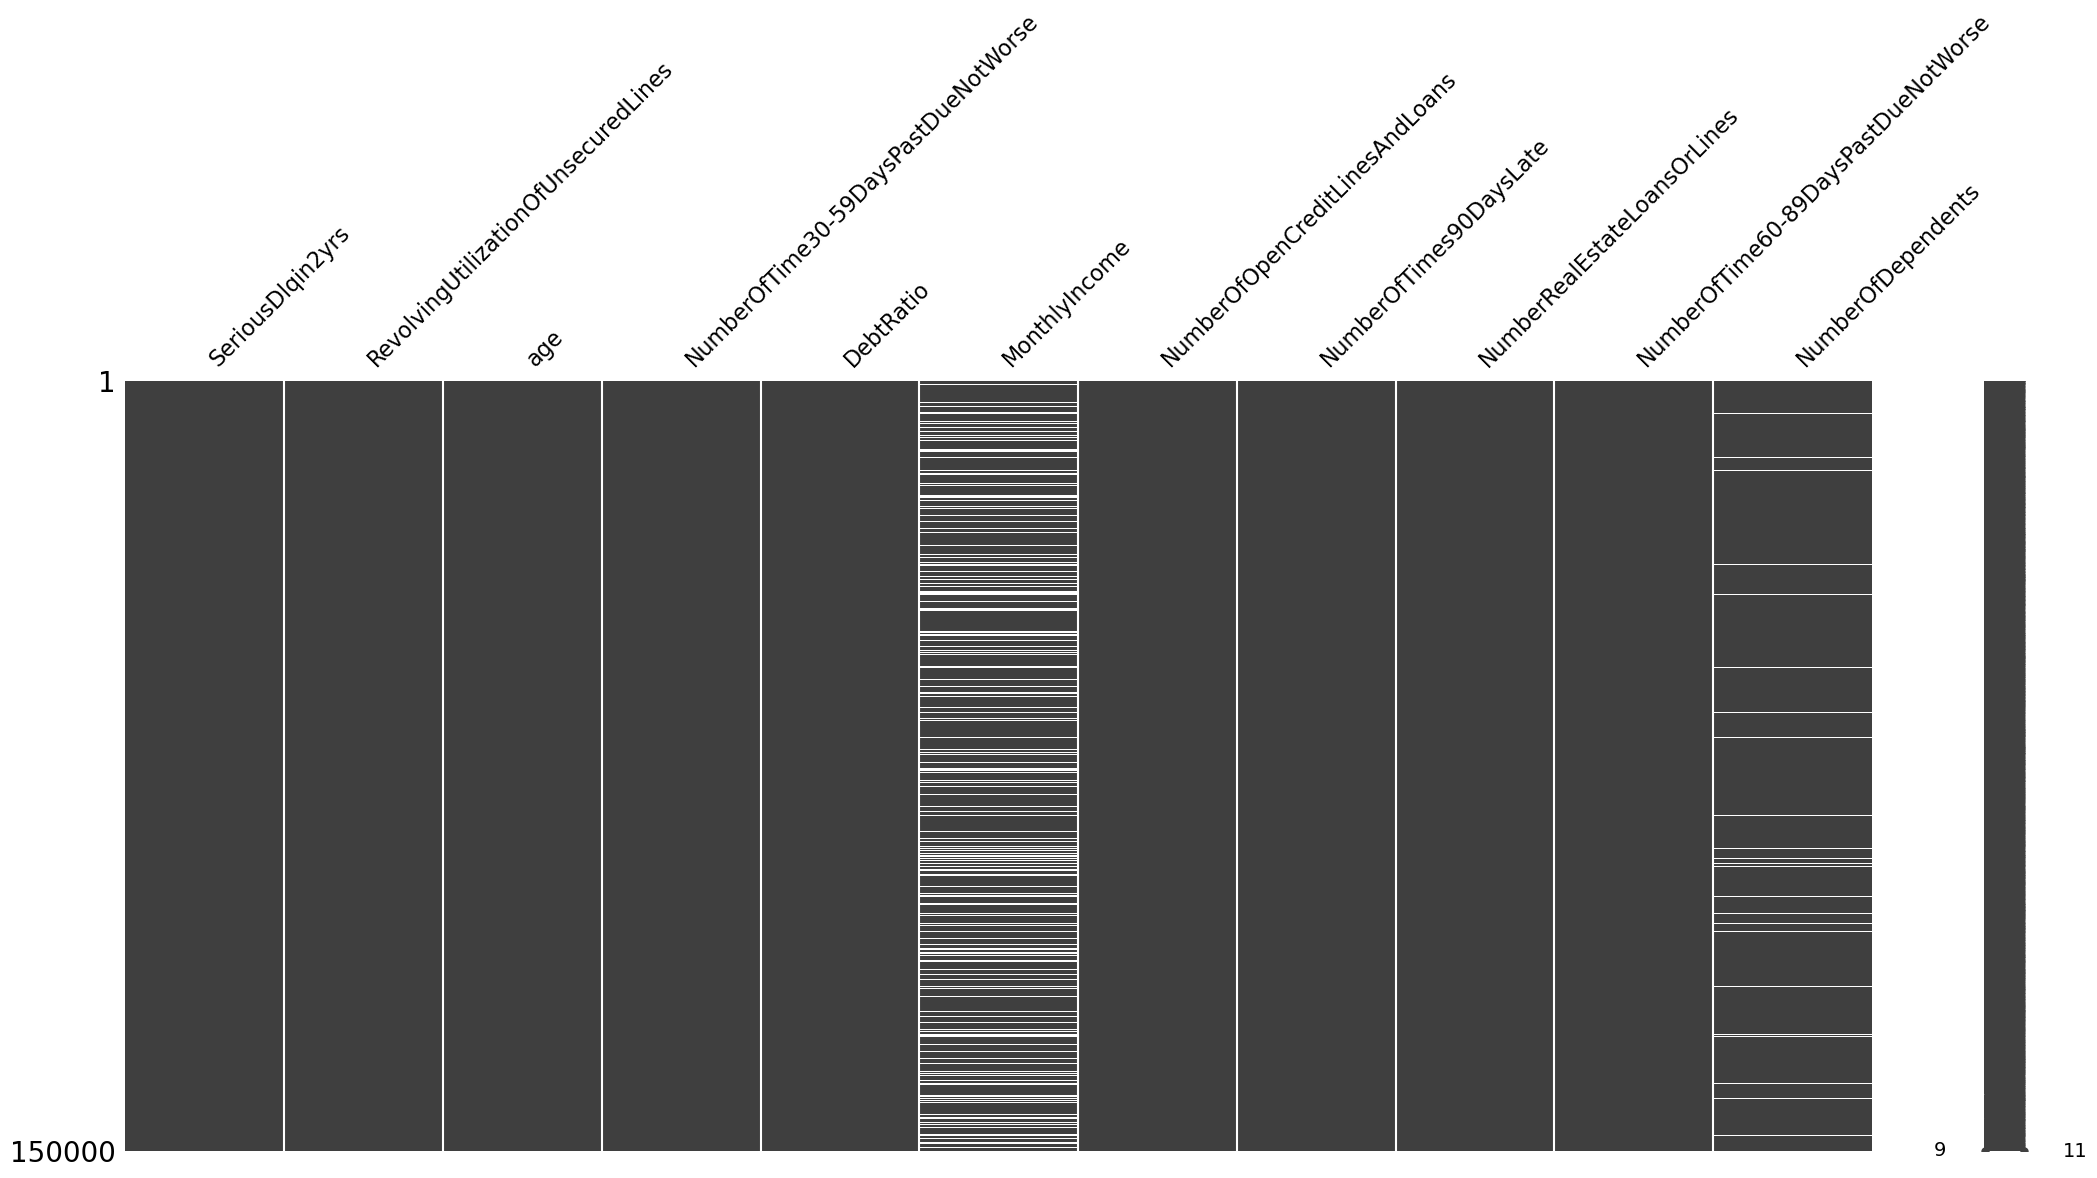

In [378]:
msno.matrix(training_df)

<Axes: >

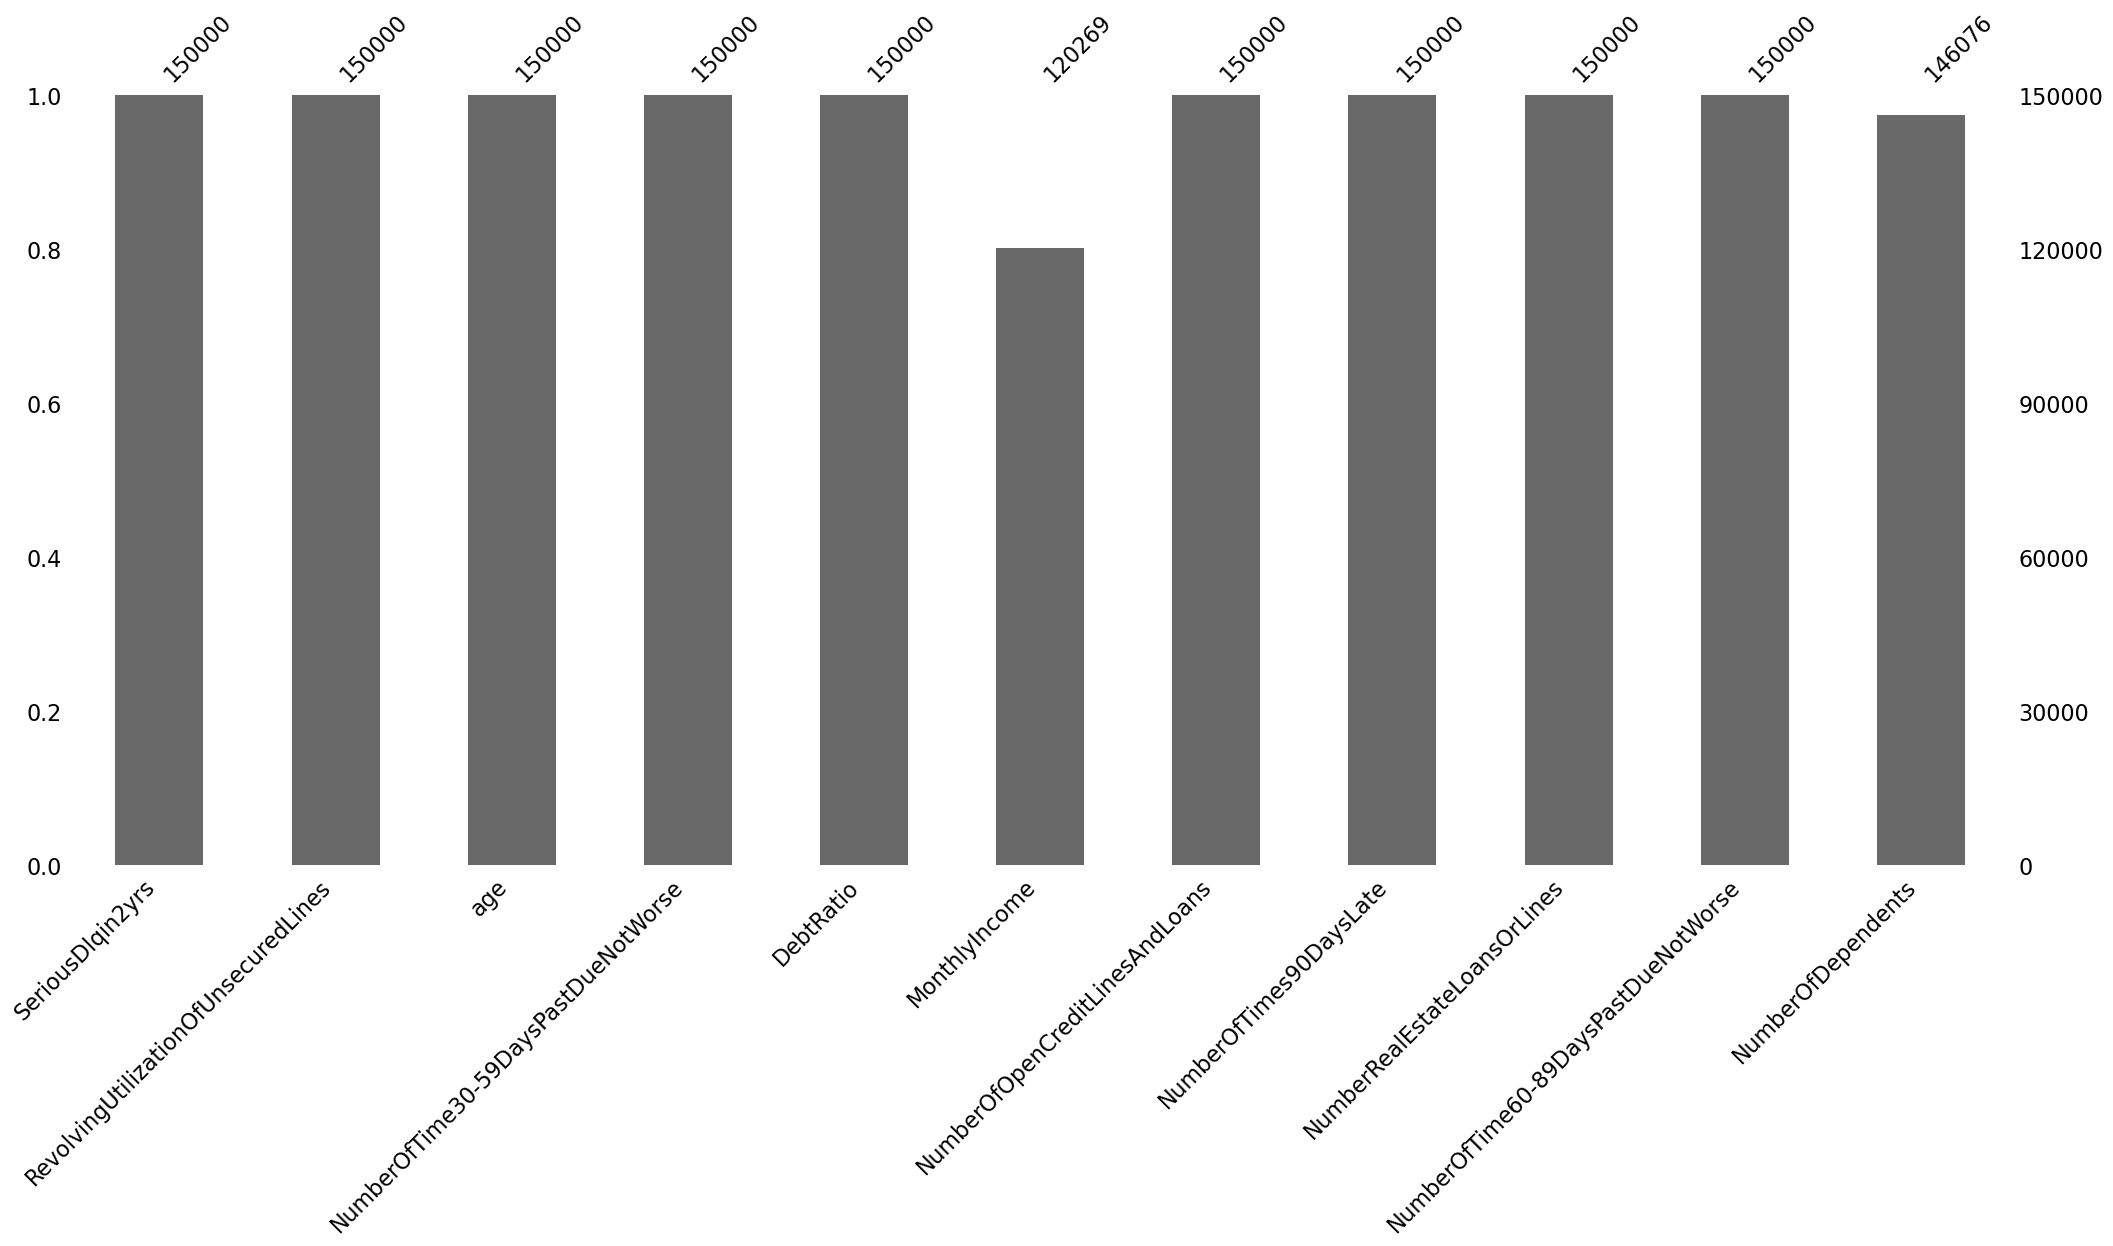

In [380]:
msno.bar(training_df)

# Describe the Data

In [384]:
training_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


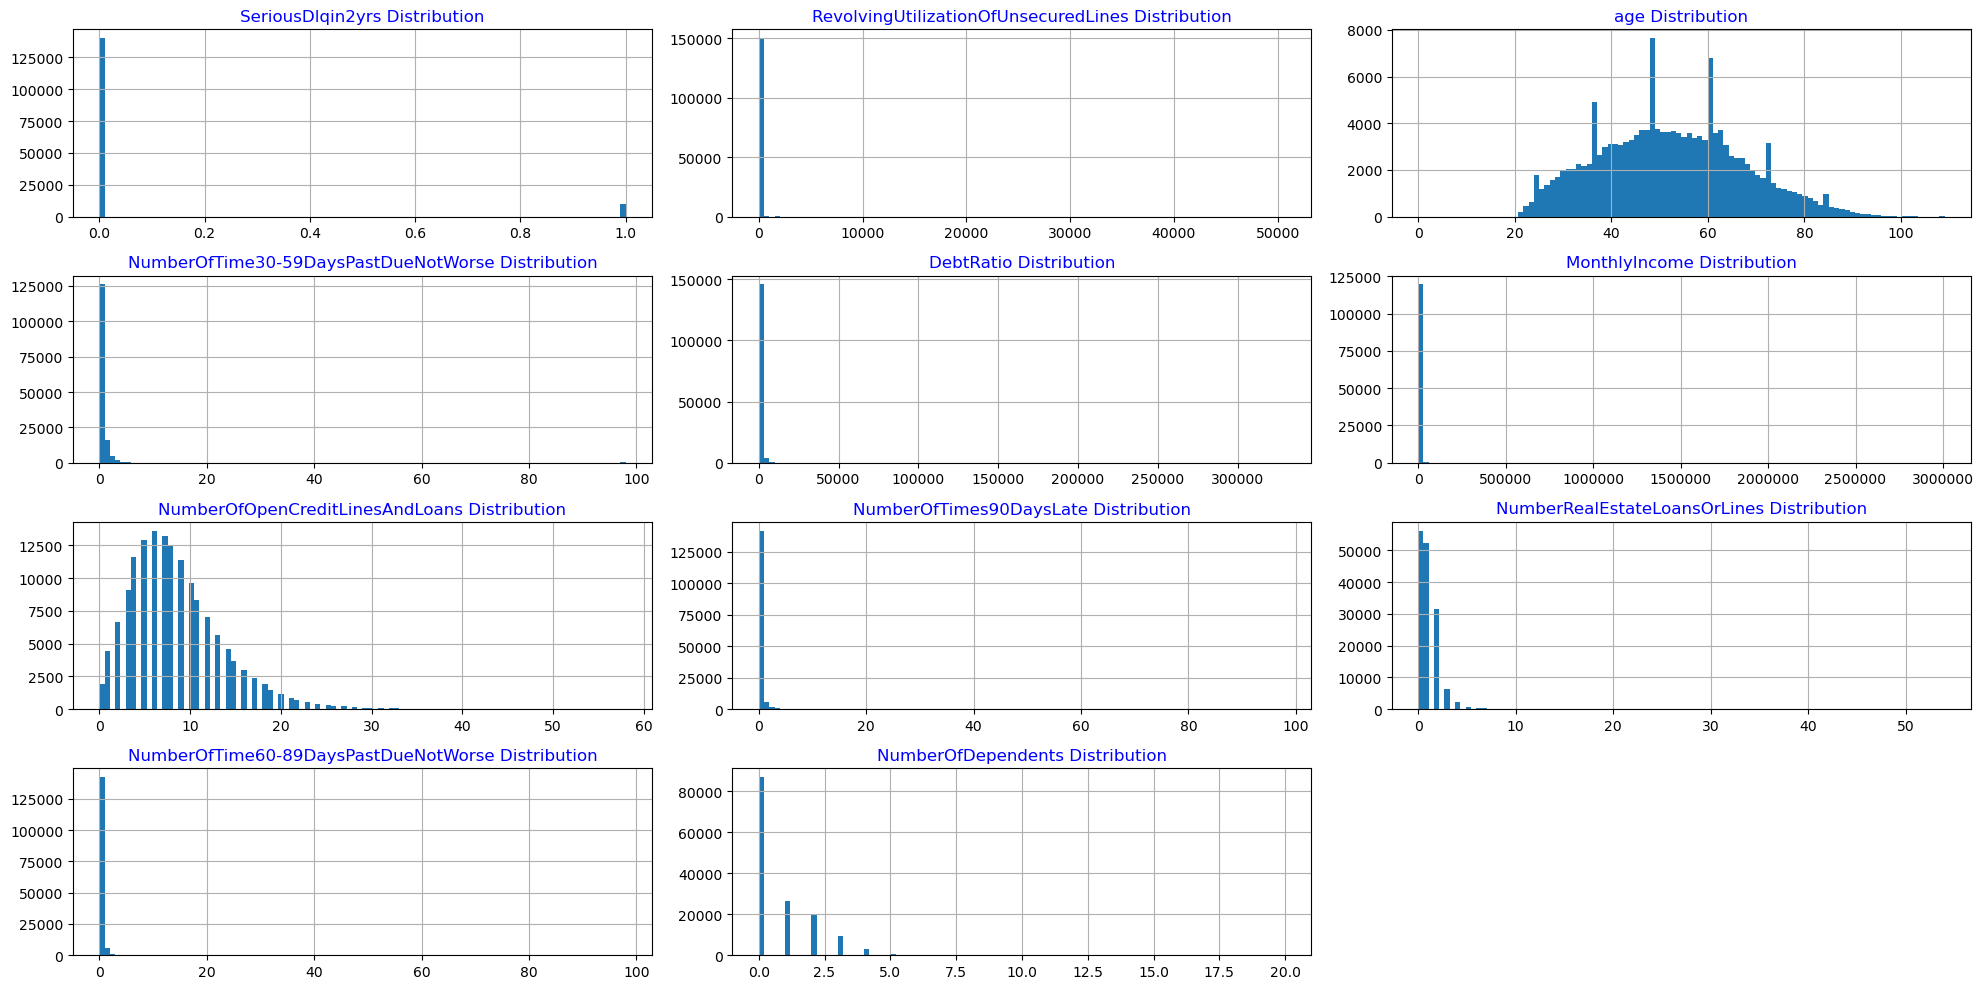

In [386]:
DrawHistogramForEachColumn(training_df, 4, 3)

# Outlier Analysis

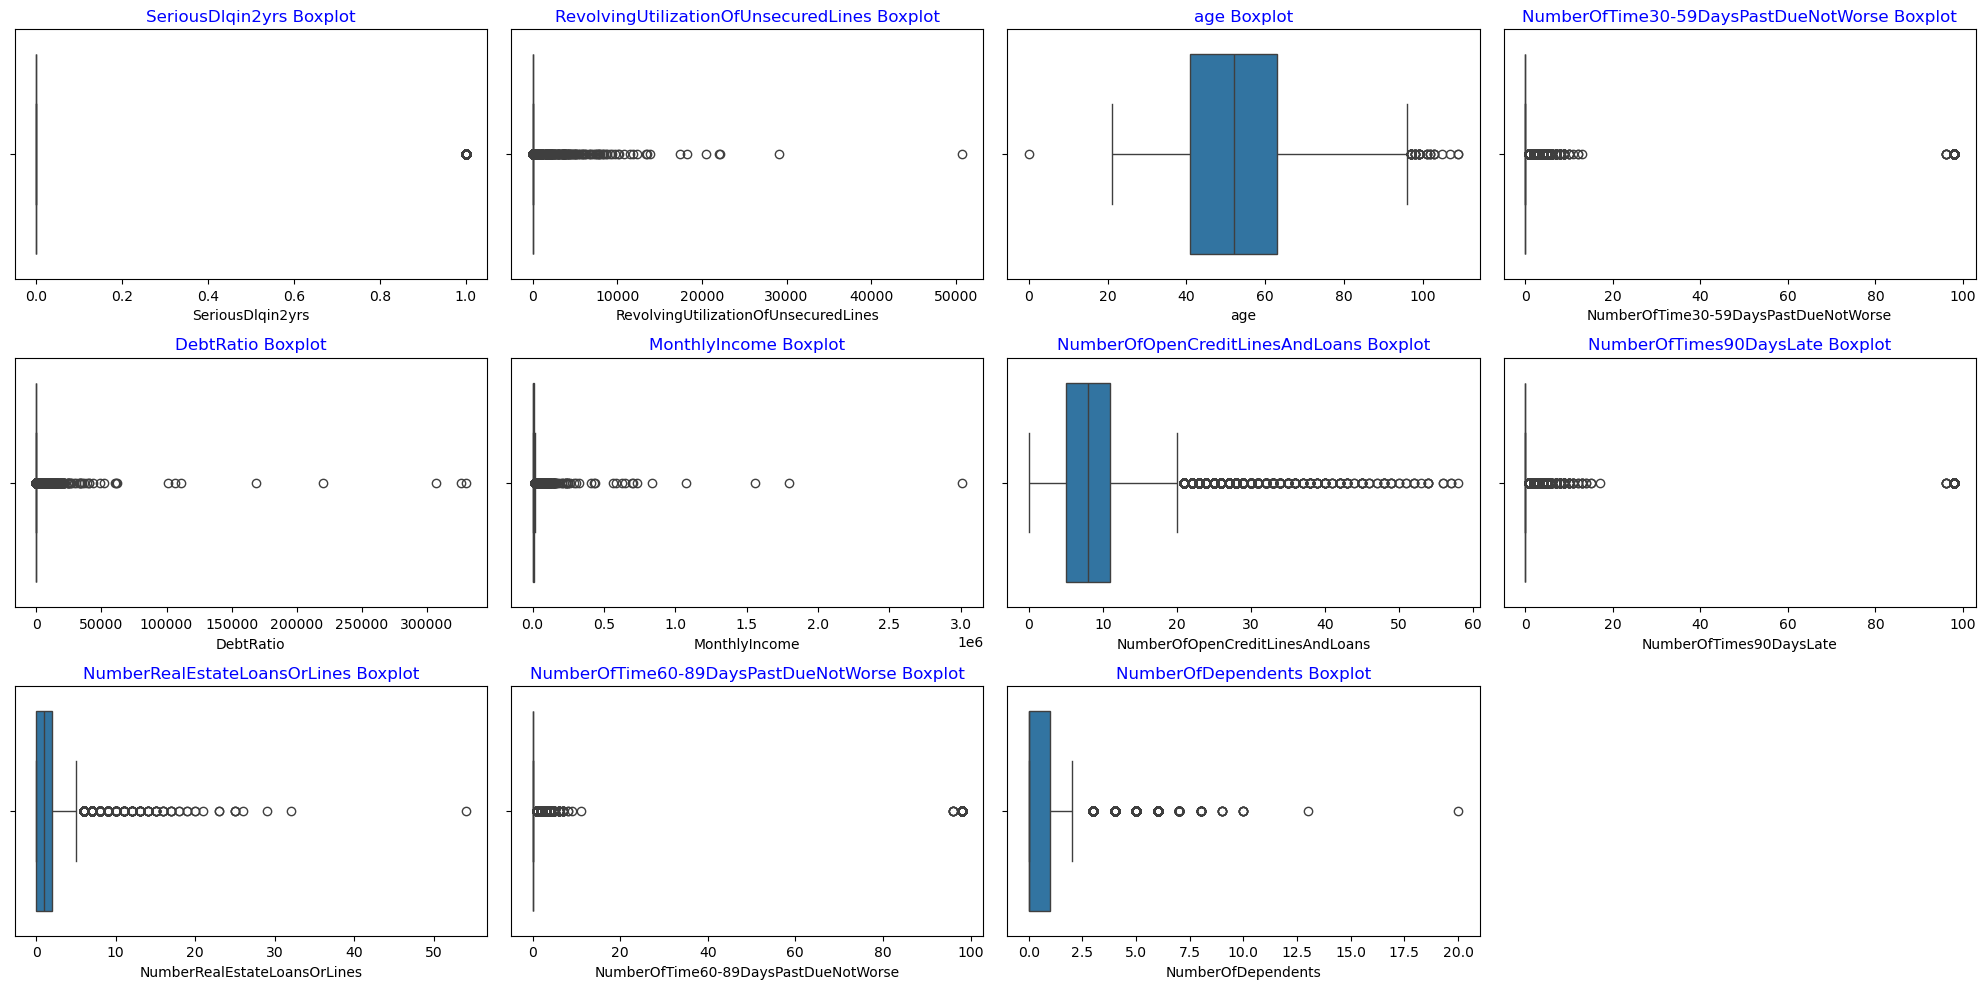

In [388]:
DrawBoxPlot(training_df,4,3)

### Age: Z Score Analysis

In [390]:
training_df[training_df.age==0]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [391]:
training_df[training_df.age<=20]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [392]:
testing_df[testing_df.age<=20]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


##### Age of 0 is a clear outlier, will replace it in later step

In [394]:
training_df.groupby('age',as_index=False).agg(count=('SeriousDlqin2yrs','count')).sort_values(by='count',ascending=False)

,age,count
29,49,3837
28,48,3806
30,50,3753
43,63,3719
27,47,3719
...,...,...
81,102,3
85,109,2
83,105,1
84,107,1


In [396]:
mu=training_df.age.mean()
std=training_df.age.std()
Z=(training_df['age']-mu)/std
pd.DataFrame(training_df[((training_df['age']-mu)/std>3) | ((training_df['age']-mu)/std<-3) ].sort_values(by='age')['age'])


,age
65695,0
436,97
136327,97
126050,97
118163,97
111408,97
110604,97
100339,97
66650,97
48964,97


### NumberOfOpenCreditLinesAndLoans: Quantile Analysis

In [399]:
def IQRAnalysis (df,column):
    lower_bound=df[column].quantile(0.25)
    upper_bound=df[column].quantile(0.75)
    IQR=upper_bound-lower_bound
    return lower_bound,upper_bound,IQR
    
lower_bound,upper_bound,IQR=IQRAnalysis (training_df,'NumberOfOpenCreditLinesAndLoans')

res=training_df[(training_df['NumberOfOpenCreditLinesAndLoans']>(upper_bound+1.5*IQR)) | (training_df['NumberOfOpenCreditLinesAndLoans']<(lower_bound-1.5*IQR))]

pd.DataFrame(res.sort_values(by= 'NumberOfOpenCreditLinesAndLoans')['NumberOfOpenCreditLinesAndLoans'])



,NumberOfOpenCreditLinesAndLoans
134801,21
58281,21
58047,21
58046,21
58025,21
...,...
51026,56
107427,56
137095,57
22683,57


### RevolvingUtilizationOfUnsecuredLines: Percentile Analysis

In [408]:
PercentileAnalysis(training_df,'RevolvingUtilizationOfUnsecuredLines',0.99)

,Percentile,# of points left of percentile,number of points in current bin
0,0.990,148500.0,148500.0
1,0.991,148650.0,150.0
2,0.992,148800.0,150.0
3,0.993,148950.0,150.0
4,0.994,149100.0,150.0
5,0.995,149250.0,150.0
6,0.996,149400.0,150.0
7,0.997,149550.0,150.0
8,0.998,149700.0,150.0
9,0.999,149850.0,150.0


In [410]:
pd.DataFrame(training_df['RevolvingUtilizationOfUnsecuredLines'].value_counts().sort_index())

,count
RevolvingUtilizationOfUnsecuredLines,
0.000000,10878
0.000008,1
0.000010,1
0.000013,1
0.000014,1
...,...
20514.000000,1
22000.000000,1
22198.000000,1


### NumberOfTime30-59DaysPastDueNotWorse: Percentile Analysis

In [413]:
PercentileAnalysis(training_df,'NumberOfTime30-59DaysPastDueNotWorse',0.99)

,Percentile,# of points left of percentile,number of points in current bin
0,0.990,149150.0,149150.0
1,0.991,149150.0,0.0
2,0.992,149150.0,0.0
3,0.993,149150.0,0.0
4,0.994,149150.0,0.0
5,0.995,149492.0,342.0
6,0.996,149492.0,0.0
7,0.997,149632.0,140.0
8,0.998,149711.0,79.0
9,0.999,150000.0,289.0


In [415]:
pd.DataFrame(training_df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index())

,count
NumberOfTime30-59DaysPastDueNotWorse,
0,126018
1,16033
2,4598
3,1754
4,747
5,342
6,140
7,54
8,25


### DebtRatio: Percentile Analysis

In [418]:
PercentileAnalysis(training_df,'DebtRatio',0.99)

,Percentile,# of points left of percentile,number of points in current bin
0,0.990,148500.0,148500.0
1,0.991,148651.0,151.0
2,0.992,148800.0,149.0
3,0.993,148952.0,152.0
4,0.994,149100.0,148.0
5,0.995,149250.0,150.0
6,0.996,149400.0,150.0
7,0.997,149550.0,150.0
8,0.998,149700.0,150.0
9,0.999,149850.0,150.0


In [420]:
pd.DataFrame(training_df['DebtRatio'].value_counts().sort_index())

,count
DebtRatio,
0.000000,4113
0.000026,1
0.000037,1
0.000039,1
0.000066,1
...,...
168835.000000,1
220516.000000,1
307001.000000,1


### MonthlyIncome: Percentile Analysis

In [423]:
PercentileAnalysis(training_df,'MonthlyIncome',0.99)

,Percentile,# of points left of percentile,number of points in current bin
0,0.990,119101.0,119101.0
1,0.991,119190.0,89.0
2,0.992,119321.0,131.0
3,0.993,119477.0,156.0
4,0.994,119563.0,86.0
5,0.995,119680.0,117.0
6,0.996,119820.0,140.0
7,0.997,119916.0,96.0
8,0.998,120028.0,112.0
9,0.999,120148.0,120.0


In [425]:
pd.DataFrame(training_df['MonthlyIncome'].value_counts().sort_index())

,count
MonthlyIncome,
0.0,1634
1.0,605
2.0,6
4.0,2
5.0,2
...,...
835040.0,1
1072500.0,1
1560100.0,1


### NumberOfTimes90DaysLate: Percentile Analysis

In [428]:
PercentileAnalysis(training_df,'NumberOfTimes90DaysLate',0.99)

,Percentile,# of points left of percentile,number of points in current bin
0,0.990,149127.0,149127.0
1,0.991,149127.0,0.0
2,0.992,149127.0,0.0
3,0.993,149127.0,0.0
4,0.994,149127.0,0.0
5,0.995,149418.0,291.0
6,0.996,149418.0,0.0
7,0.997,149629.0,211.0
8,0.998,149707.0,78.0
9,0.999,150000.0,293.0


##### NumberOfTimes90DaysLate with value of 96,98 are obvious outliers, will replace in later steps

In [431]:
 pd.DataFrame(training_df['NumberOfTimes90DaysLate'].value_counts().sort_index())

,count
NumberOfTimes90DaysLate,
0,141662
1,5243
2,1555
3,667
4,291
5,131
6,80
7,38
8,21


### NumberRealEstateLoansOrLines: Percentile Analysis

In [434]:
PercentileAnalysis(training_df,'NumberRealEstateLoansOrLines',0.99)

,Percentile,# of points left of percentile,number of points in current bin
0,0.990,148518.0,148518.0
1,0.991,149207.0,689.0
2,0.992,149207.0,0.0
3,0.993,149207.0,0.0
4,0.994,149207.0,0.0
5,0.995,149527.0,320.0
6,0.996,149527.0,0.0
7,0.997,149698.0,171.0
8,0.998,149791.0,93.0
9,0.999,149869.0,78.0


In [436]:
 pd.DataFrame(training_df['NumberRealEstateLoansOrLines'].value_counts().sort_index())

,count
NumberRealEstateLoansOrLines,
0,56188
1,52338
2,31522
3,6300
4,2170
5,689
6,320
7,171
8,93


### NumberOfTime60-89DaysPastDueNotWorse: Percentile Analysis

In [439]:
PercentileAnalysis(training_df,'NumberOfTime60-89DaysPastDueNotWorse',0.99)

,Percentile,# of points left of percentile,number of points in current bin
0,0.990,149245.0,149245.0
1,0.991,149245.0,0.0
2,0.992,149245.0,0.0
3,0.993,149245.0,0.0
4,0.994,149245.0,0.0
5,0.995,149563.0,318.0
6,0.996,149563.0,0.0
7,0.997,149563.0,0.0
8,0.998,149702.0,139.0
9,0.999,150000.0,298.0


In [441]:
 pd.DataFrame(training_df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index())

,count
NumberOfTime60-89DaysPastDueNotWorse,
0,142396
1,5731
2,1118
3,318
4,105
5,34
6,16
7,9
8,2


### NumberOfDependents: Percentile Analysis

In [444]:
PercentileAnalysis(training_df,'NumberOfDependents',0.99)

,Percentile,# of points left of percentile,number of points in current bin
0,0.990,145085.0,145085.0
1,0.991,145085.0,0.0
2,0.992,145085.0,0.0
3,0.993,145085.0,0.0
4,0.994,145831.0,746.0
5,0.995,145831.0,0.0
6,0.996,145831.0,0.0
7,0.997,145831.0,0.0
8,0.998,145831.0,0.0
9,0.999,145989.0,158.0


In [446]:
 pd.DataFrame(training_df['NumberOfDependents'].value_counts().sort_index())

,count
NumberOfDependents,
0.0,86902
1.0,26316
2.0,19522
3.0,9483
4.0,2862
5.0,746
6.0,158
7.0,51
8.0,24


# Outlier Imputation

### Unlikely a person will have 20 dependents

In [450]:
training_df['NumberOfDependents']=training_df['NumberOfDependents'].replace(20,training_df['NumberOfDependents'].median())

### Unlikely a person with age of 0  will have 6000 monthly income and at the same time hold debt

In [453]:
training_df['age']=training_df['age'].replace(0,training_df['age'].median())

### Replace NumberOfTimes90DaysLate with extreme value of 96,98 with median

In [456]:

med=training_df['NumberOfTimes90DaysLate'].median()
training_df['NumberOfTimes90DaysLate']=training_df['NumberOfTimes90DaysLate'].replace(96,med)
training_df['NumberOfTimes90DaysLate']=training_df['NumberOfTimes90DaysLate'].replace(98,med)

# Missing Value Imputation

In [459]:
training_df['MonthlyIncome']=training_df['MonthlyIncome'].fillna(training_df['MonthlyIncome'].median())
training_df['NumberOfDependents']=training_df['MonthlyIncome'].fillna(training_df['MonthlyIncome'].median())

In [461]:
#data = np.random.exponential(scale=1e6, size=1000)

# Create histogram
#plt.hist(data, bins=50)

# Set tick label format to plain style (decimal notation)

#plt.ticklabel_format(style='plain')
#plt.hist(training_df['MonthlyIncome'],bins=50)

# Imbalanced Data

6.684%   93.316%


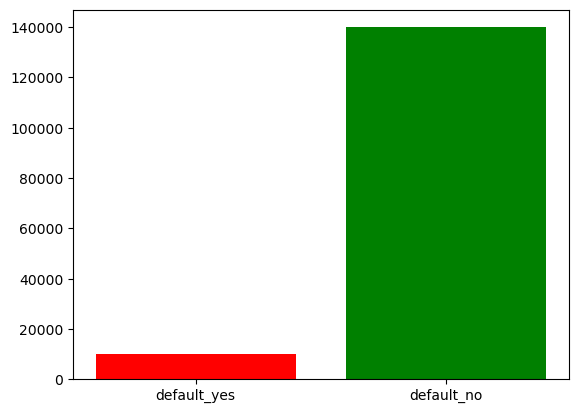

In [464]:
default_yes=training_df[training_df.SeriousDlqin2yrs==1]['SeriousDlqin2yrs']
default_no=training_df[training_df.SeriousDlqin2yrs==0]['SeriousDlqin2yrs']
class_count=[default_yes.count(),default_no.count()]
plt.bar(['default_yes', 'default_no'], class_count, color=['red', 'green'])
#sns.barplot(penguins, x="body_mass_g", y="island", hue="island", legend=False)
print(f'{round(100*default_yes.count()/training_df['SeriousDlqin2yrs'].count(),4)}%',' ',f'{round(100*default_no.count()/training_df['SeriousDlqin2yrs'].count(),4)}%')

# Prepare For Training/Testing

In [467]:
train_x=training_df.drop(columns='SeriousDlqin2yrs')
train_y=training_df['SeriousDlqin2yrs']

test_x=testing_df.drop(columns='SeriousDlqin2yrs').iloc[:,1:]
test_y=testing_df['SeriousDlqin2yrs']

# Cross Validation of 5

In [846]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from scipy.stats import randint

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [848]:
glm = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
rf = RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1,
                            random_state=None,min_impurity_decrease=0.0, max_samples=None,
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, verbose=0)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)


gb = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

ada= AdaBoostClassifier(estimator=None, n_estimators=100, learning_rate=1)
xg=xgb.XGBClassifier(n_estimators=100)



In [827]:
def cvDictionary (models,scr,X_train=X_train,y_train=y_train,cv=3,verbose=2):
    cvDictionary = {}
    kfold=KFold(n_splits=cv,shuffle=True,random_state=None)
    for model in models:
        cvScore=cross_val_score(model,X_train,y_train,scoring=scr, cv=kfold,verbose=verbose)
        cvDictionary[str(model).split('(')[0]] = [cvScore.mean(),cvScore.std()]        
    return cvDictionary
        
    

In [829]:
cvResults=cvDictionary (models=[glm,rf,knn,gb,ada,xg],scr='roc_auc')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1
iter   5  #CD cycles 2
iter   6  #CD cycles 1
iter   7  #CD cycles 2
iter   8  #CD cycles 2
iter   9  #CD cycles 1
iter  10  #CD cycles 7
iter  11  #CD cycles 11
iter  12  #CD cycles 3
iter  13  #CD cycles 9
iter  14  #CD cycles 1
iter  15  #CD cycles 29
iter  16  #CD cycles 4
iter  17  #CD cycles 5
iter  18  #CD cycles 2
iter  19  #CD cycles 10
iter  20  #CD cycles 2
iter  21  #CD cycles 1
iter  22  #CD cycles 13
iter  23  #CD cycles 29
iter  24  #CD cycles 8
iter  25  #CD cycles 8
iter  26  #CD cycles 7
optimization finished, #iter = 26
Objective value = 16939.582673
#nonzeros/#features = 11/11
[CV] END .................................................... total time=   0.3s
[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 3
iter   5  #CD cycles 1
iter   6  #CD cycles 2
iter   7  #CD cycles 2
iter   8  #CD cycles 1
iter   9  #CD cyc

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


iter  19  #CD cycles 17
iter  20  #CD cycles 8
iter  21  #CD cycles 114
iter  22  #CD cycles 8
optimization finished, #iter = 22
Objective value = 16726.869740
#nonzeros/#features = 11/11
[CV] END .................................................... total time=   0.3s
[LibLinear]iter   1  #CD cycles 1
iter   2  #CD cycles 1
iter   3  #CD cycles 1
iter   4  #CD cycles 1


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


iter   5  #CD cycles 2
iter   6  #CD cycles 1
iter   7  #CD cycles 4
iter   8  #CD cycles 3
iter   9  #CD cycles 1
iter  10  #CD cycles 13
iter  11  #CD cycles 3
iter  12  #CD cycles 1
iter  13  #CD cycles 18
iter  14  #CD cycles 5
iter  15  #CD cycles 9
iter  16  #CD cycles 3
iter  17  #CD cycles 14
iter  18  #CD cycles 1
iter  19  #CD cycles 17
iter  20  #CD cycles 25
iter  21  #CD cycles 11
optimization finished, #iter = 21
Objective value = 16655.814236
#nonzeros/#features = 11/11
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=  11.1s
[CV] END .................................................... total time=  11.0s
[CV] END .................................................... total time=  10.8s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.6s
[CV] END ...............

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................................................... total time=   4.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................................................... total time=   3.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................................................... total time=   3.8s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


##### From the result we see that GradientBoosting,AdaBoost,and XGBoost has the best performance (AUC), we proceed to Hyperparameter tuning

In [831]:
cvResults

{'LogisticRegression': [0.7729228466942359, 0.002719185051728062],
 'RandomForestClassifier': [0.8362183401324357, 0.005046088395132731],
 'KNeighborsClassifier': [0.5665898526041241, 0.0026568071216321576],
 'GradientBoostingClassifier': [0.8639777840612842, 0.005116217614403359],
 'AdaBoostClassifier': [0.8584503963935394, 0.0042250954742805115],
 'XGBClassifier': [0.8524713025839108, 0.003257978073364069]}

# Hyper parameter Tuning


In [850]:
from sklearn.model_selection import GridSearchCV

In [852]:
adaHyperParams={'n_estimators':[100,200,400], 'learning_rate':[0.5,1]}

In [854]:
grid_search_Ada = GridSearchCV(ada, adaHyperParams, cv=5, scoring='roc_auc',verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   4.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   4.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   4.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   9.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=  10.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   9.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   9.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   9.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=400; total time=  18.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=400; total time=  18.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=400; total time=  18.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=400; total time=  18.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=400; total time=  18.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   4.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   9.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   9.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   9.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   9.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   9.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  18.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  19.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  18.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  18.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  19.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [866]:
print(f'Best Parameters: {grid_search_Ada.best_params_}')
print(f'Best Score: {grid_search_Ada.best_score_}')



Best Parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best Score: 0.8601356247947054


In [869]:
gbHyperParams={'loss' : ['log_loss', 'exponential'],'n_estimators':[100,200,400], 'max_depth':[3,5,8]}

grid_search_GB = GridSearchCV(gb, gbHyperParams, cv=5, scoring='roc_auc',verbose=2).fit(X_train, y_train)

In [873]:
print(f'Best Parameters: {grid_search_GB.best_params_}, Best Score: {grid_search_GB.best_score_}')

Best Parameters: {'loss': 'exponential', 'max_depth': 3, 'n_estimators': 200}, Best Score: 0.8654820524777005


In [881]:
xgHyperParams={'n_estimators':[100,150,200],'lambda':[0,1],'alpha':[0,1],'max_depth':[1,3,5], 'eta':[0.3,0.5,1]}

In [883]:
grid_search_xg = GridSearchCV(xg, xgHyperParams, cv=5, scoring='roc_auc',verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END alpha=0, eta=0.3, lambda=0, max_depth=1, n_estimators=100; total time=   0.2s
[CV] END alpha=0, eta=0.3, lambda=0, max_depth=1, n_estimators=100; total time=   0.2s
[CV] END alpha=0, eta=0.3, lambda=0, max_depth=1, n_estimators=100; total time=   0.1s
[CV] END alpha=0, eta=0.3, lambda=0, max_depth=1, n_estimators=100; total time=   0.1s
[CV] END alpha=0, eta=0.3, lambda=0, max_depth=1, n_estimators=100; total time=   0.1s
[CV] END alpha=0, eta=0.3, lambda=0, max_depth=1, n_estimators=150; total time=   0.2s
[CV] END alpha=0, eta=0.3, lambda=0, max_depth=1, n_estimators=150; total time=   0.1s
[CV] END alpha=0, eta=0.3, lambda=0, max_depth=1, n_estimators=150; total time=   0.1s
[CV] END alpha=0, eta=0.3, lambda=0, max_depth=1, n_estimators=150; total time=   0.1s
[CV] END alpha=0, eta=0.3, lambda=0, max_depth=1, n_estimators=150; total time=   0.2s
[CV] END alpha=0, eta=0.3, lambda=0, max_depth=1, n_estimators=200;

In [885]:
print(f'Best Parameters: {grid_search_xg.best_params_}, Best Score: {grid_search_xg.best_score_}')

Best Parameters: {'alpha': 1, 'eta': 0.3, 'lambda': 1, 'max_depth': 3, 'n_estimators': 100}, Best Score: 0.8651366981111291


# In Sample AUC with best estimators

In [901]:
Bestgb = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=200, max_depth=3)
Bestada= AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
Bestxg=xgb.XGBClassifier(alpha=1,reg_lambda=1,max_depth=3,n_estimators=100)

In [905]:
Cvs=cvDictionary (models=[Bestgb,Bestada,Bestxg],scr='roc_auc')

[CV] END .................................................... total time=  19.6s
[CV] END .................................................... total time=  18.4s
[CV] END .................................................... total time=  18.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................................................... total time=   3.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................................................... total time=   4.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END .................................................... total time=   4.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


In [915]:
Cvs=pd.DataFrame(Cvs)
Cvs.index=['Mean AUC','Std']
Cvs

,GradientBoostingClassifier,AdaBoostClassifier,XGBClassifier
Mean AUC,0.864437,0.859434,0.863611
Std,0.001480,0.000927,0.000731


# Show AUC and Roc Curve with best estimators for the three models chosen

In [948]:


X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)














def plotCvRocCurve(X, y, classifier, nfolds=5):
    
    from sklearn.metrics import roc_curve, auc
    from sklearn.model_selection import StratifiedKFold
    import matplotlib.pyplot as plt
    from scipy import interpolate

    cv = StratifiedKFold()

    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    for i, (train, test) in enumerate(cv):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])

        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        mean_tpr += interpolate.interp1d(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

    mean_tpr /= len(cv)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('CV ROC curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(15,5)

    plt.show()

def plot_roc_curve(false_positive_rate, true_positive_rate, label="ROC Curve"):
    """
        Purpose: To plot an ROC curve.
    """
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    plt.plot(false_positive_rate, true_positive_rate, linewidth=1)
    plt.plot([0,1],[0,1], "r--") 
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive rate") 
    
    title_obj = ax.set_title(label)
    plt.setp(title_obj, color='w')                     # Individual title colours.
    ax.xaxis.label.set_color('white')  
    ax.yaxis.label.set_color('white')          
    ax.tick_params(axis='x', colors='white')       #set the color of xticks
    ax.tick_params(axis='y', colors='white')       #set the color of yticks    
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    plt.grid(b=True, which='major', color='gray', linestyle='--')
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [1049]:

def PlotRocCurve(model,train_x=train_x,train_y=train_y, cv=5 ):
    from sklearn.model_selection import StratifiedKFold
    import matplotlib.patches as patches
    fig1 = plt.figure(figsize=[12,12])
    ax1 = fig1.add_subplot(111,aspect = 'equal')
    ax1.add_patch(
      patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
    ax1.add_patch(
      patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )
    cv = StratifiedKFold(n_splits=5,shuffle=False)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    for train,test in cv.split(train_x,train_y):
        prediction = model.fit(train_x.iloc[train],train_y.iloc[train]).predict_proba(train_x.iloc[test])
        fpr, tpr, t = roc_curve(train_y[test], prediction[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
        i= i+1
    
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',
           label=r'Mean ROC (AUC = %0.4f )' % (mean_auc),lw=2, alpha=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.text(0.32,0.7,'More accurate area',fontsize = 12)
    plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
    plt.show()


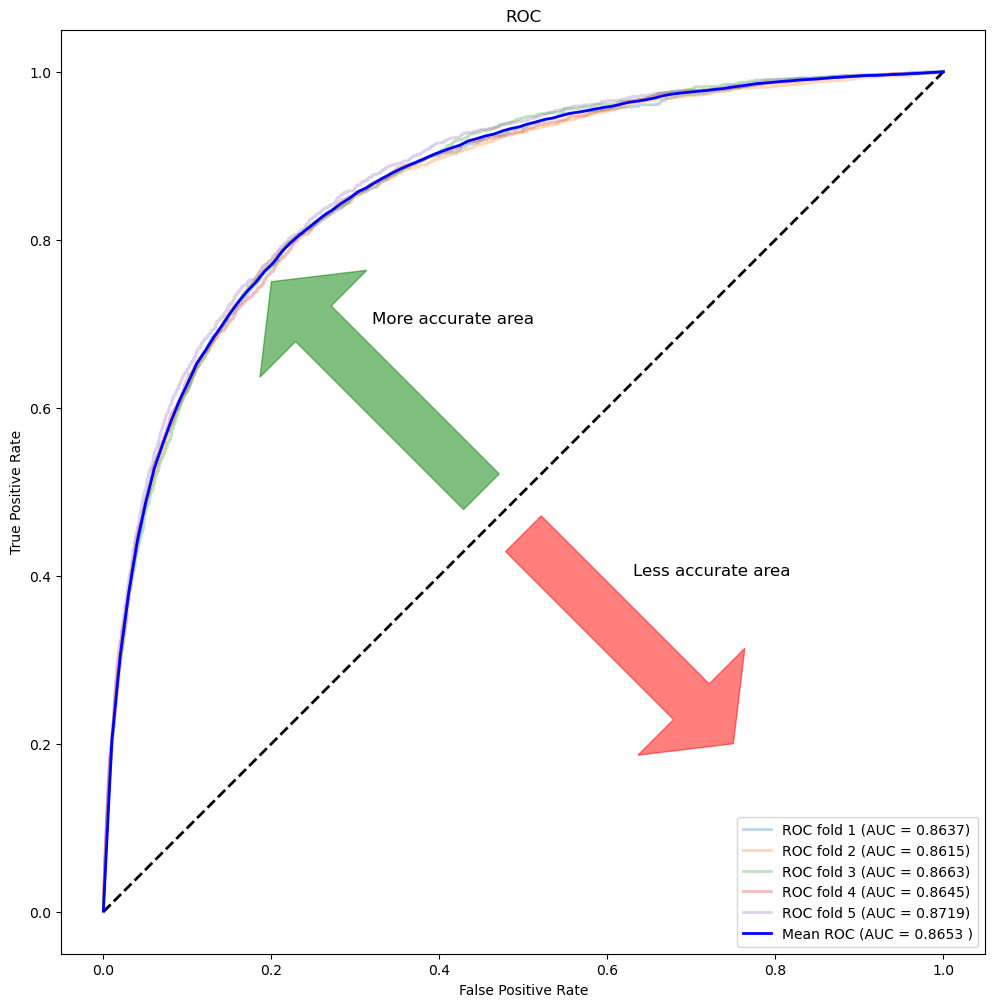

In [1051]:
PlotRocCurve(Bestgb,train_x=train_x,train_y=train_y, cv=5 )

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

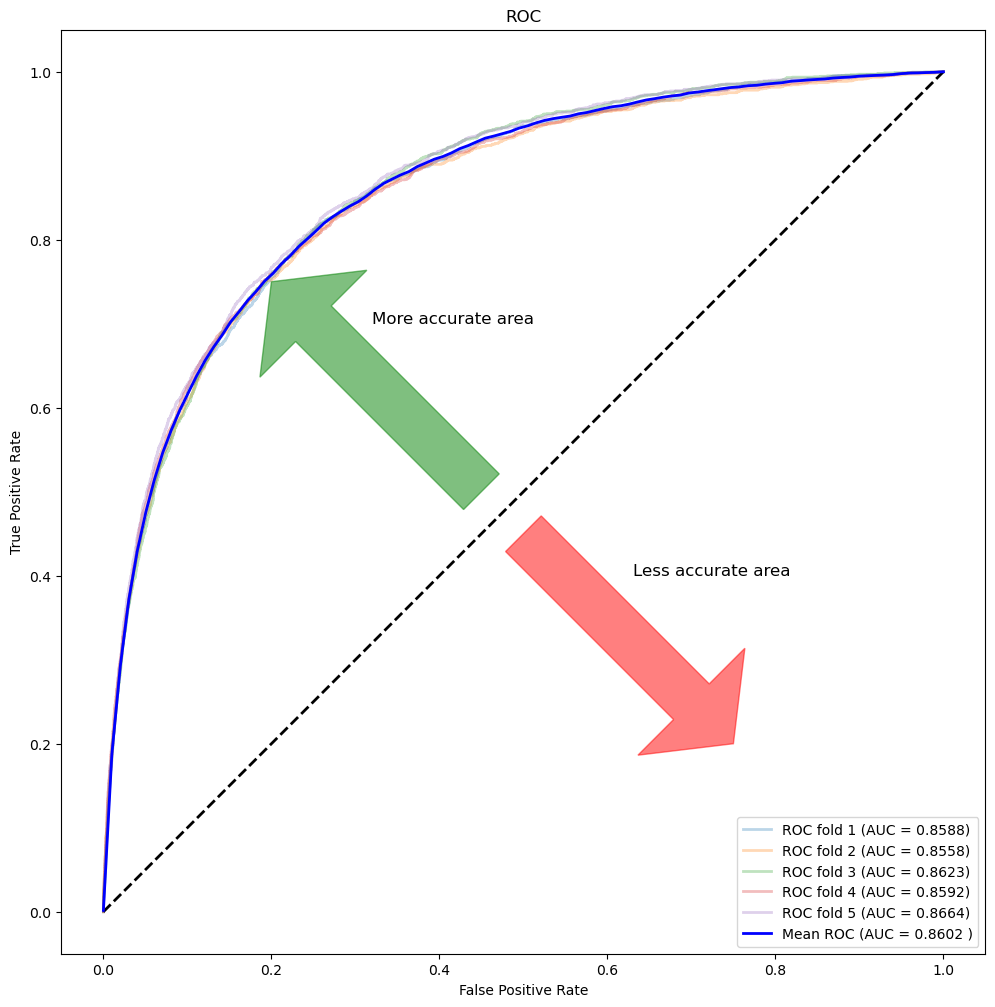

In [1052]:
PlotRocCurve(Bestada,train_x=train_x,train_y=train_y, cv=5 )

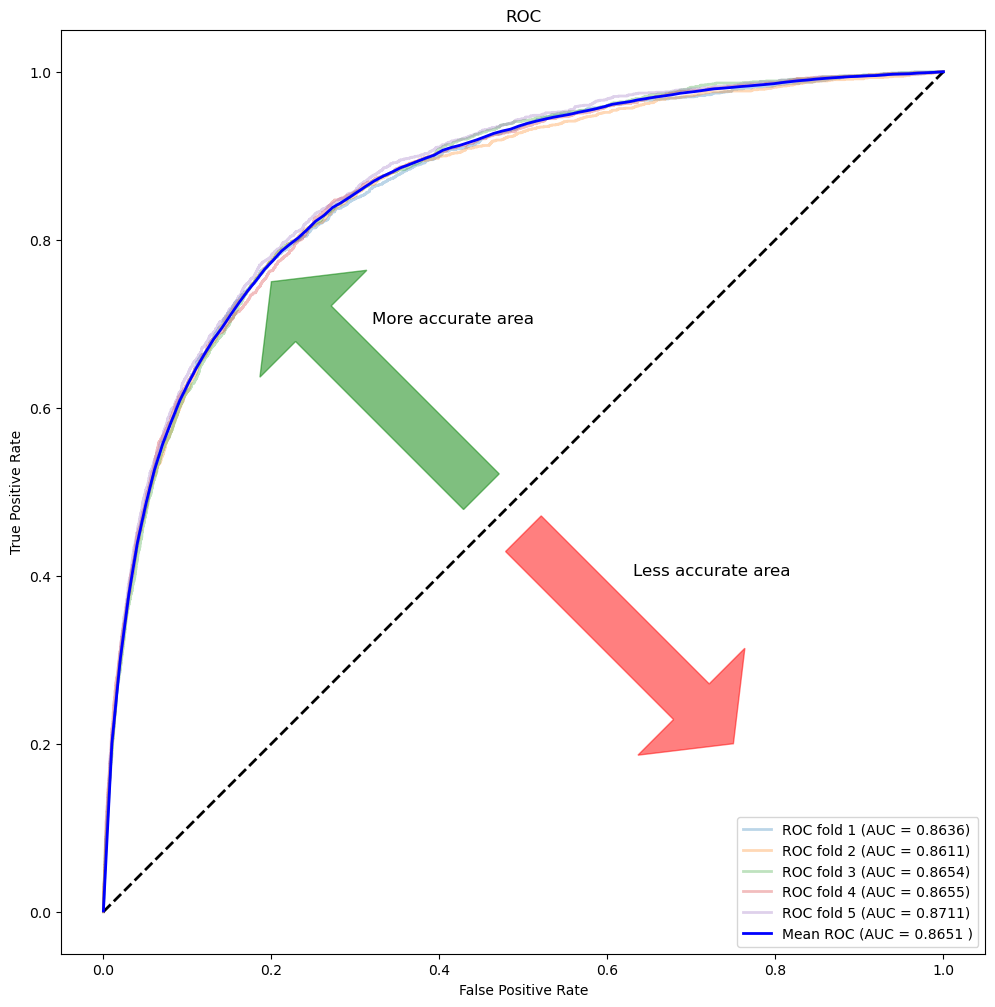

In [1053]:
PlotRocCurve(Bestxg,train_x=train_x,train_y=train_y, cv=5 )